In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
import os
print("Current working directory:", os.getcwd())
print("Files here:", os.listdir())



Current working directory: c:\Users\USER\UsedBikePrice\notebooks
Files here: ['used_bike_price.ipynb']


In [10]:
import pandas as pd
df = pd.read_csv(r"C:\Users\USER\UsedBikePrice\data\bikes.csv")


In [14]:
import re
import numpy as np

# --- Helper functions ---
def extract_cc(model_name):
    s = str(model_name).lower()
    m = re.search(r'(\d{2,4})\s*cc', s)
    if m: return int(m.group(1))
    return np.nan

def extract_first_number(x):
    if pd.isna(x): return np.nan
    m = re.search(r'(\d+(\.\d+)?)', str(x))
    return float(m.group(1)) if m else np.nan

def parse_power(x):
    if pd.isna(x): return np.nan
    s = str(x).lower().split('@')[0]
    if 'kw' in s: return extract_first_number(s)*1.341
    if 'ps' in s: return extract_first_number(s)*0.99
    if 'hp' in s and 'bhp' not in s: return extract_first_number(s)*0.986
    return extract_first_number(s)

def clean_kms(x):
    if pd.isna(x): return np.nan
    m = re.search(r'(\d+)', str(x))
    return int(m.group(1)) if m else np.nan

# --- Apply transformations ---
df['cc'] = df['model_name'].apply(extract_cc)
df['brand'] = df['model_name'].str.split().str[0].str.title()

df['mileage'] = df['mileage'].apply(extract_first_number)
df['power'] = df['power'].apply(parse_power)
df['kms_driven'] = df['kms_driven'].apply(clean_kms)

# Fill missing values safely
df['mileage'] = df.groupby('brand')['mileage'].transform(lambda x: x.fillna(x.median()))
df['power'] = df.groupby('brand')['power'].transform(lambda x: x.fillna(x.median()))
df['kms_driven'] = df['kms_driven'].fillna(int(df['kms_driven'].median()))
df['cc'] = df.groupby('brand')['cc'].transform(lambda x: x.fillna(x.median()))
df['cc'] = df['cc'].fillna(df['cc'].median())  # in case any remain

# Convert types safely
df = df.copy()
df['model_year'] = df['model_year'].astype(int)
df['kms_driven'] = df['kms_driven'].astype(int)
df['mileage'] = df['mileage'].astype(float)
df['power'] = df['power'].astype(float)
df['cc'] = df['cc'].astype(int)
df['price'] = df['price'].astype(int)

# Check for remaining missing values
print("Missing values after cleaning:\n", df.isna().sum())
display(df.head())


Missing values after cleaning:
 model_name     0
model_year     0
kms_driven     0
owner          0
location      19
mileage       60
power          1
price          0
cc             0
brand          0
dtype: int64


c:\Users\USER\UsedBikePrice\venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\USER\UsedBikePrice\venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\USER\UsedBikePrice\venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\USER\UsedBikePrice\venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\USER\UsedBikePrice\venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\USER\UsedBikePrice\venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: R

,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc,brand
0,Bajaj Avenger Cruise 220 2017,2017,17000,first owner,hyderabad,35.0,19.0,63500,150,Bajaj
1,Royal Enfield Classic 350cc 2016,2016,50000,first owner,hyderabad,35.0,19.8,115000,350,Royal
2,Hyosung GT250R 2012,2012,14795,first owner,hyderabad,30.0,28.0,300000,250,Hyosung
3,Bajaj Dominar 400 ABS 2017,2017,28,first owner,pondicherry,28.0,34.5,100000,150,Bajaj
4,Jawa Perak 330cc 2020,2020,2000,first owner,bangalore,NaN,30.0,197500,330,Jawa


In [15]:
import numpy as np

CURRENT_YEAR = 2025  # update if needed

# 1️⃣ Bike age
df['bike_age'] = CURRENT_YEAR - df['model_year']

# 2️⃣ Log-transform price (helps with skewed distribution)
df['price_log'] = np.log1p(df['price'])

# 3️⃣ Power per cc (engine efficiency)
df['power_per_cc'] = df['power'] / df['cc'].replace(0, np.nan)
df['power_per_cc'] = df['power_per_cc'].fillna(df['power_per_cc'].median())

# Quick check
display(df.head())


,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc,brand,bike_age,price_log,power_per_cc
0,Bajaj Avenger Cruise 220 2017,2017,17000,first owner,hyderabad,35.0,19.0,63500,150,Bajaj,8,11.058811,0.126667
1,Royal Enfield Classic 350cc 2016,2016,50000,first owner,hyderabad,35.0,19.8,115000,350,Royal,9,11.652696,0.056571
2,Hyosung GT250R 2012,2012,14795,first owner,hyderabad,30.0,28.0,300000,250,Hyosung,13,12.611541,0.112000
3,Bajaj Dominar 400 ABS 2017,2017,28,first owner,pondicherry,28.0,34.5,100000,150,Bajaj,8,11.512935,0.230000
4,Jawa Perak 330cc 2020,2020,2000,first owner,bangalore,NaN,30.0,197500,330,Jawa,5,12.193499,0.090909


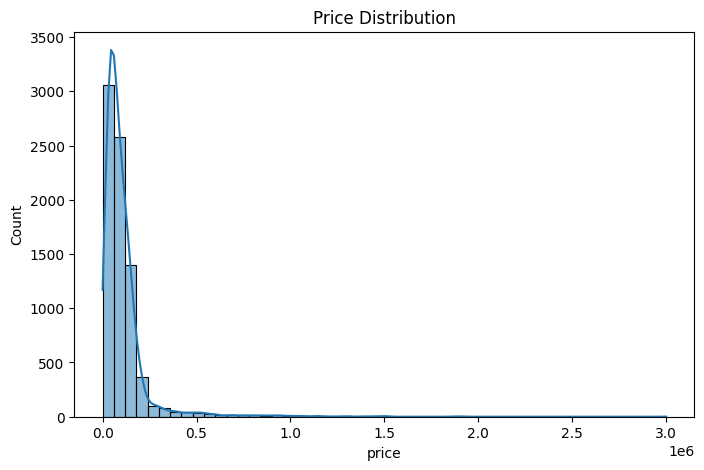

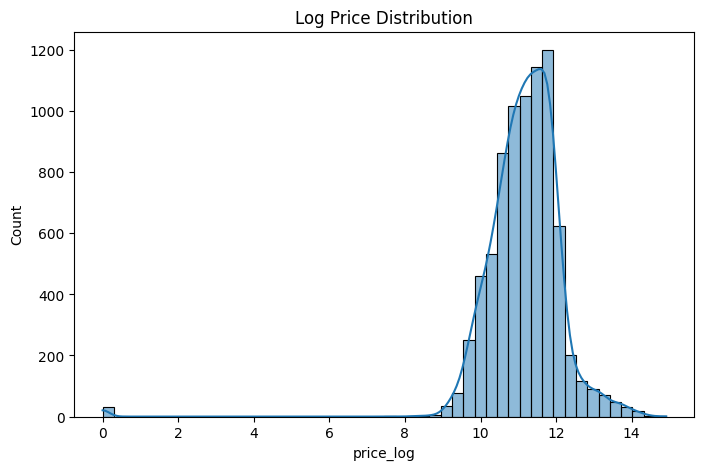

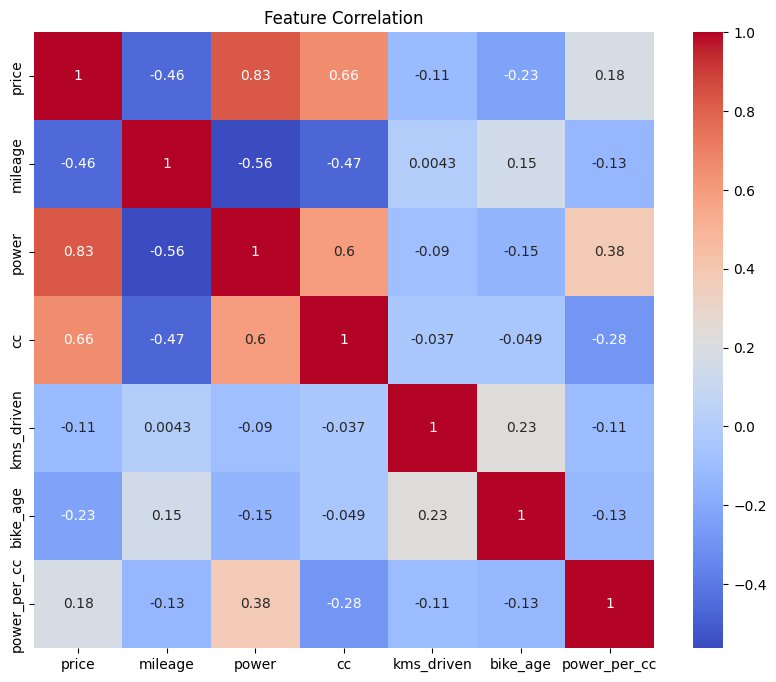

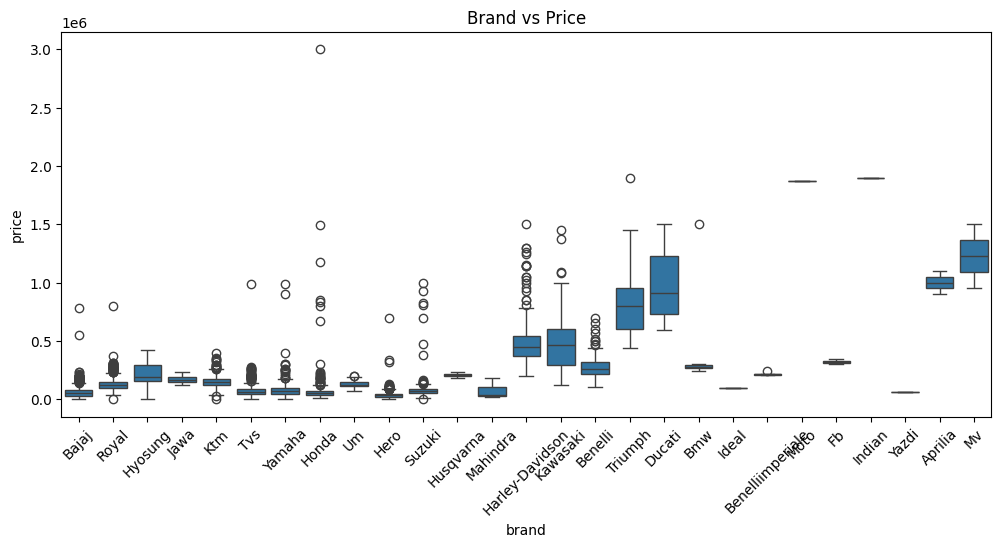

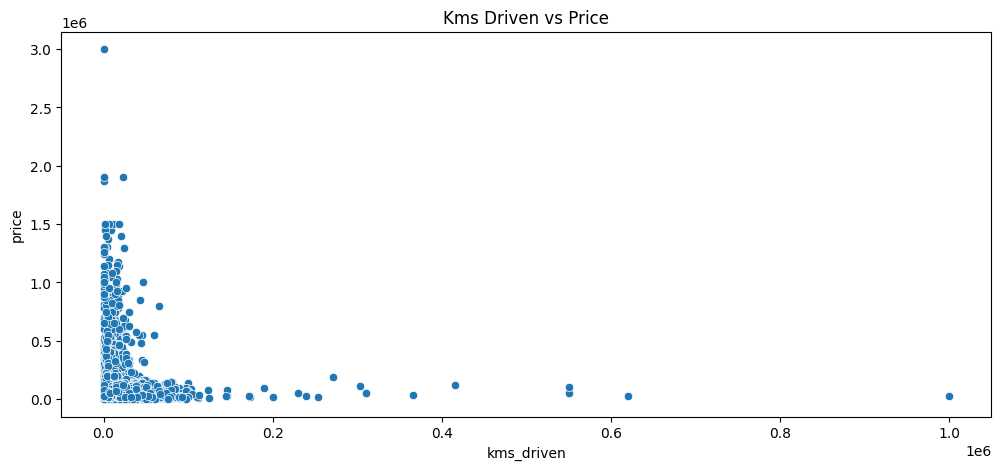

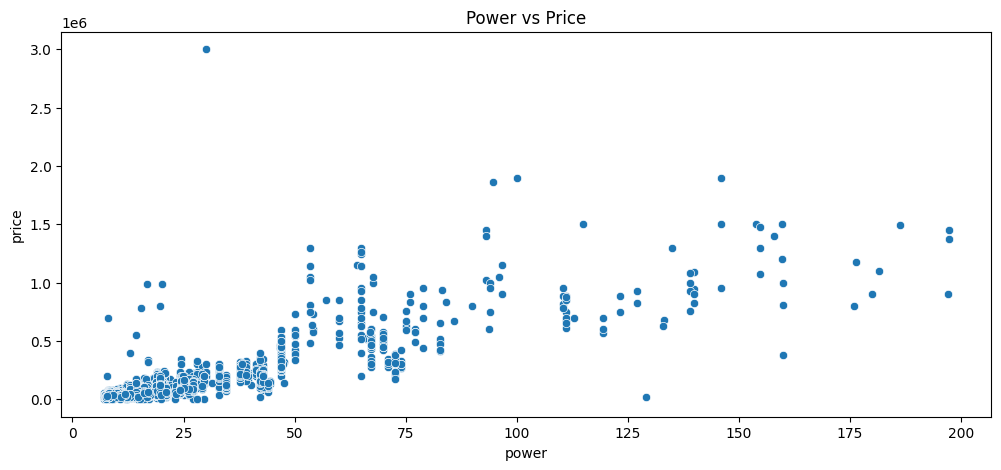

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Price distribution
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.show()

# Log-transformed price distribution
plt.figure(figsize=(8,5))
sns.histplot(df['price_log'], bins=50, kde=True)
plt.title("Log Price Distribution")
plt.show()

# 2️⃣ Correlation heatmap
plt.figure(figsize=(10,8))
corr = df[['price', 'mileage', 'power', 'cc', 'kms_driven', 'bike_age', 'power_per_cc']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

# 3️⃣ Brand vs Price (boxplot)
plt.figure(figsize=(12,5))
sns.boxplot(x='brand', y='price', data=df)
plt.xticks(rotation=45)
plt.title("Brand vs Price")
plt.show()

# 4️⃣ Scatter plots for numeric features vs price
plt.figure(figsize=(12,5))
sns.scatterplot(x='kms_driven', y='price', data=df)
plt.title("Kms Driven vs Price")
plt.show()

plt.figure(figsize=(12,5))
sns.scatterplot(x='power', y='price', data=df)
plt.title("Power vs Price")
plt.show()


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# 1️⃣ One-hot encode 'brand'
ohe = OneHotEncoder(sparse_output=False, drop='first')  # updated parameter
brand_encoded = ohe.fit_transform(df[['brand']])
brand_df = pd.DataFrame(brand_encoded, columns=ohe.get_feature_names_out(['brand']))

# 2️⃣ Combine with original dataframe
df_model = pd.concat([df.drop(columns=['brand','model_name','price']), brand_df], axis=1)

# 3️⃣ Define features (X) and target (y)
X = df_model.drop(columns=['price_log'])
y = df_model['price_log']  # predict log(price)

# 4️⃣ Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 6285
Testing samples: 1572


In [20]:
# 1️⃣ Check for any remaining NaNs
print("Any NaNs in X_train?", X_train.isna().sum().sum())
print("Any NaNs in X_test?", X_test.isna().sum().sum())

# 2️⃣ Ensure all columns are numeric
print(X_train.dtypes.unique())  # should only show int64 or float64

# 3️⃣ If there are still non-numeric columns, drop them or encode
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])


Any NaNs in X_train? 61
Any NaNs in X_test? 19
[dtype('int64') dtype('O') dtype('float64')]


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)  # should now work

y_pred_rf = rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Random Forest RMSE (log price):", rmse_rf)


Random Forest RMSE (log price): 0.8337827962711055


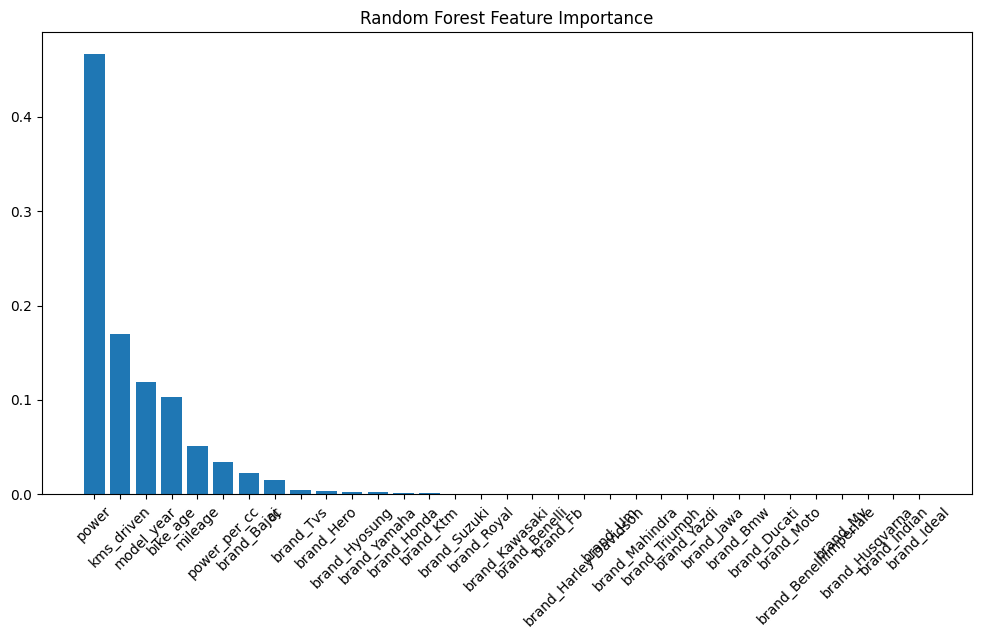

In [22]:
import matplotlib.pyplot as plt

# Feature importance
importances = rf.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Random Forest Feature Importance")
plt.bar(range(len(features)), importances[indices], align='center')
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=45)
plt.show()


In [25]:
import os
print("Current working directory:", os.getcwd())
print("Files here:", os.listdir())


Current working directory: c:\Users\USER\UsedBikePrice\notebooks
Files here: ['rf_model.joblib', 'used_bike_price.ipynb']


In [28]:
import joblib
joblib.dump(rf, "rf_model.joblib")
print("Random Forest model saved successfully!")


Random Forest model saved successfully!


In [29]:
df.to_csv("bikes_cleaned.csv", index=False)
print("Cleaned dataset saved as bikes_cleaned.csv")


Cleaned dataset saved as bikes_cleaned.csv


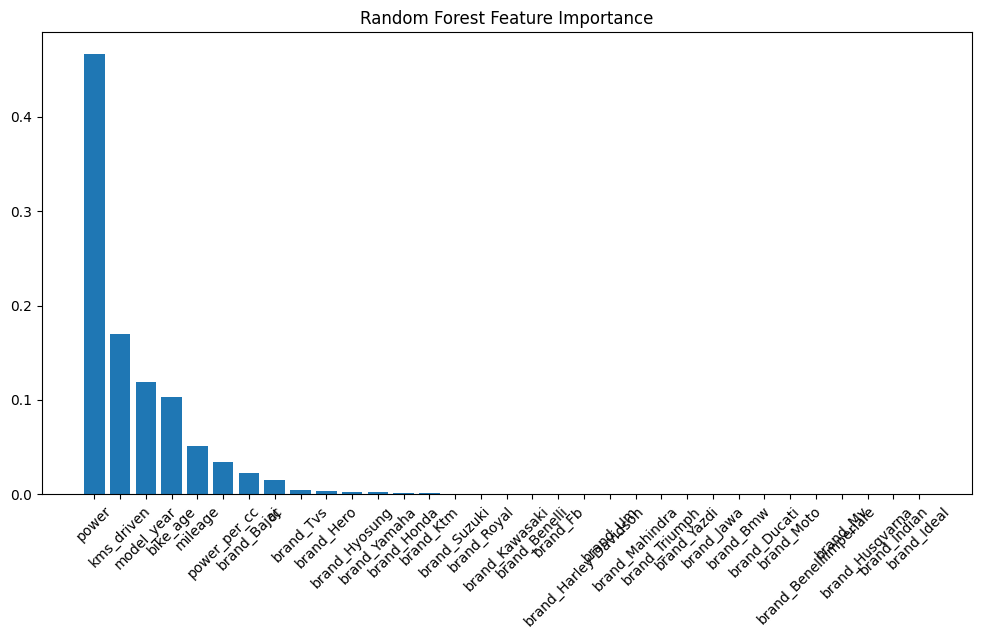

In [30]:
import matplotlib.pyplot as plt

# Random Forest feature importance
importances = rf.feature_importances_
features = X_train.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(12,6))
plt.title("Random Forest Feature Importance")
plt.bar(range(len(features)), importances[indices], align='center')
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=45)
plt.show()
